In [10]:
#Artificial Intelligence and Machine Learning - Dr.SU
#Created by GuoRui. 1630013011 on 2018/11/26.
#Test by python 2.7 on MacOS 10.14 with Anaconda.
#Copyright © 2018 C. All rights reserved.

#Import all the package that I will use.
import numpy as np
import pandas as pd #CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#read data from csv file.
data = pd.read_csv('ProjectData.csv',sep = ',')

In [12]:
#Get the attribute infomation
data.head(10)

,Attribute A,Attribute B,Attribute C,Attribute D,Attribute E,Attribute F,Attribute G,Attribute H,Attribute I,Attribute J,Attribute K,Ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
#Get all data analysis
data.describe(include='all')

,Attribute A,Attribute B,Attribute C,Attribute D,Attribute E,Attribute F,Attribute G,Attribute H,Attribute I,Attribute J,Attribute K,Ranking
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,8.367111,0.523793,0.274890,2.556204,0.086815,15.915277,45.253502,0.996764,3.309473,0.658659,10.457205,5.660440
std,1.770966,0.177666,0.194764,1.429167,0.044412,10.600786,32.132602,0.001922,0.154219,0.165347,1.063330,0.814654
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,21.500000,0.995570,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.640000,0.430000,2.600000,0.090500,22.000000,60.000000,0.997900,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000,8.000000


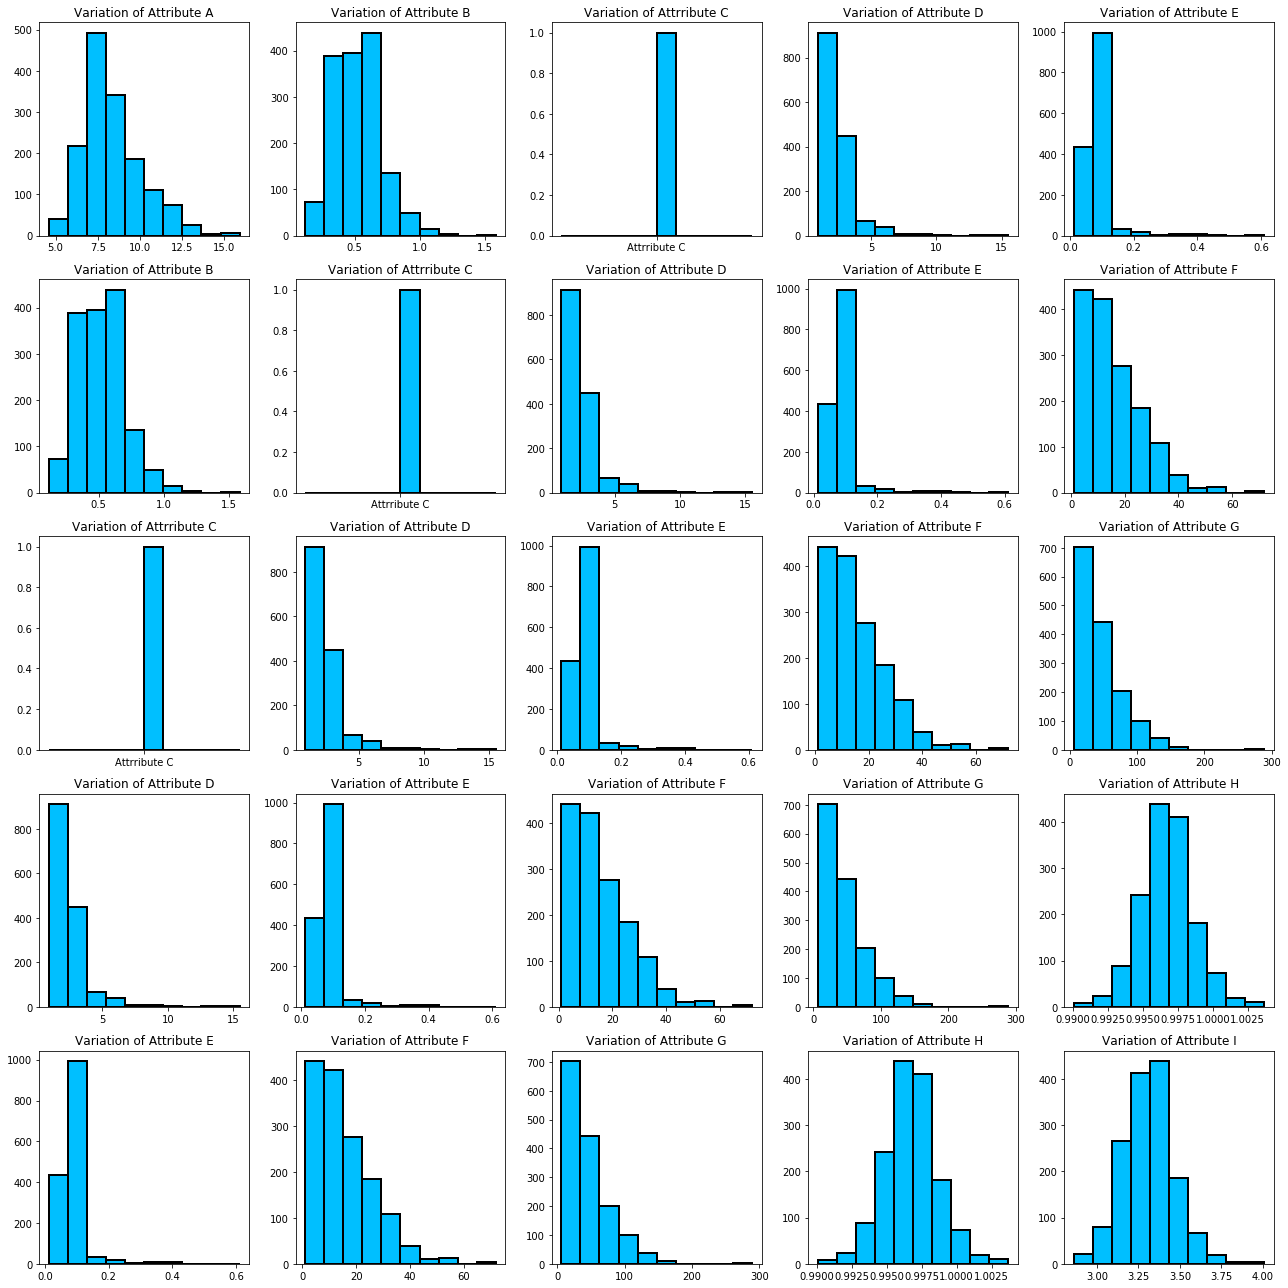

In [14]:
# using a histogram to present all attribute each other
fig,axes=plt.subplots(5,5)
columns=['Attribute A', 'Attribute B', 'Attrribute C', 'Attribute D',
       'Attribute E', 'Attribute F', 'Attribute G', 'Attribute H',
       'Attribute I', 'Attribute J', 'Attribute K', 'Ranking']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=data,edgecolor='#000000',linewidth=2,color='#00BFFF')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

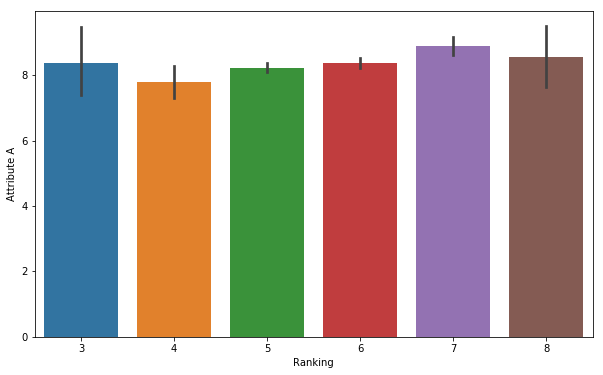

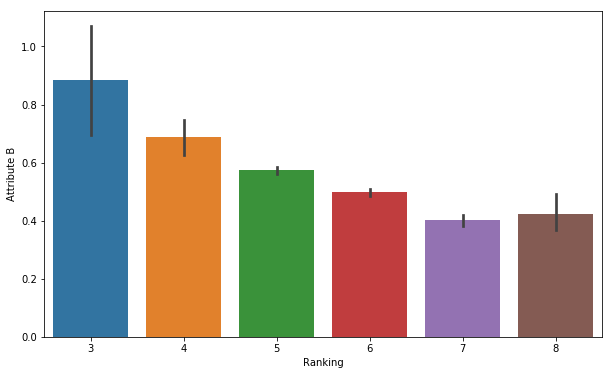

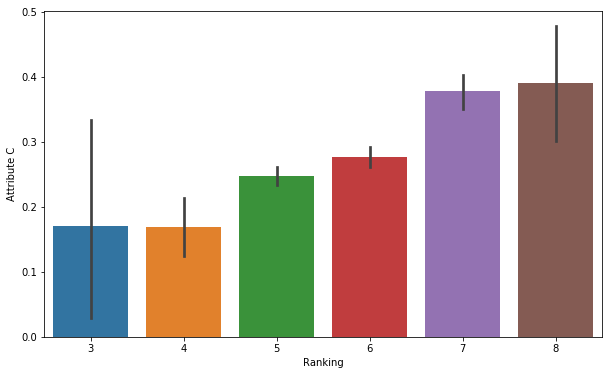

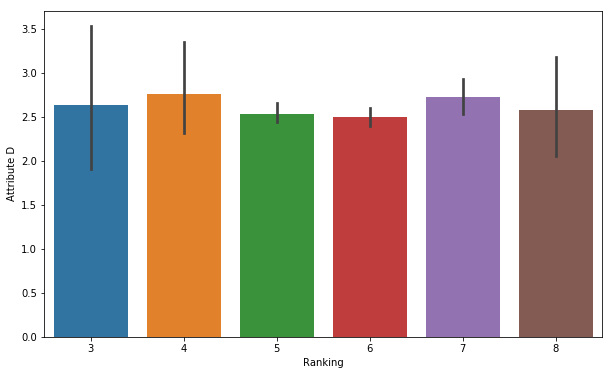

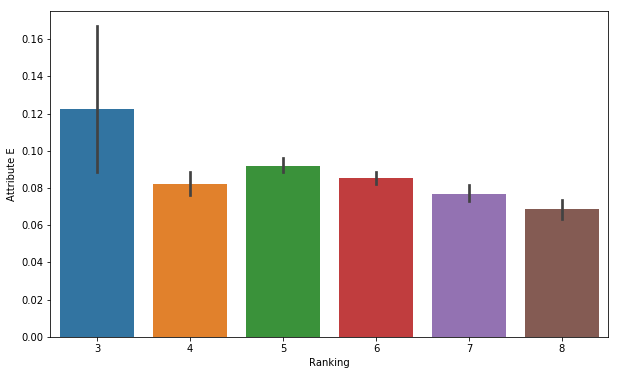

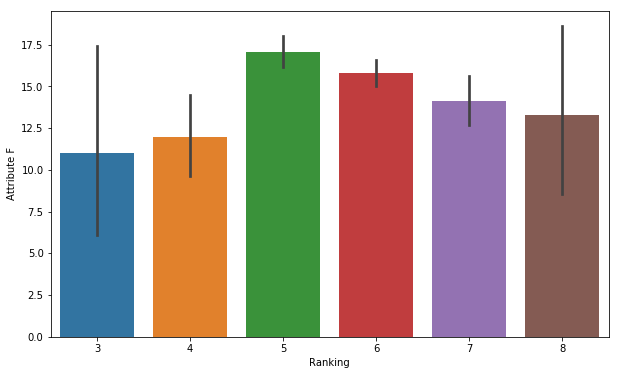

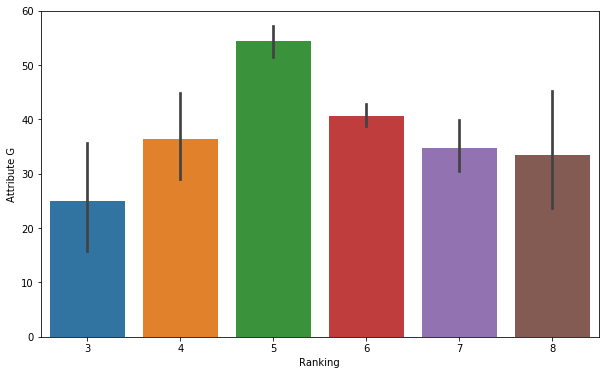

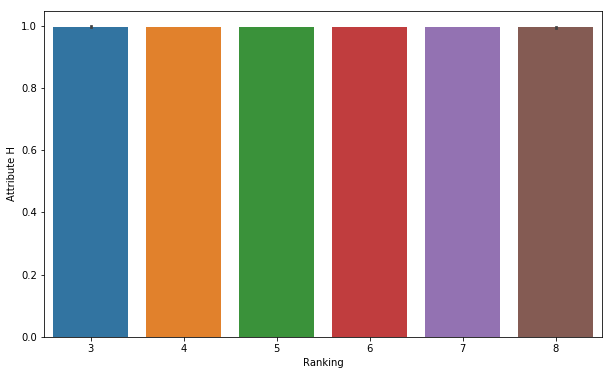

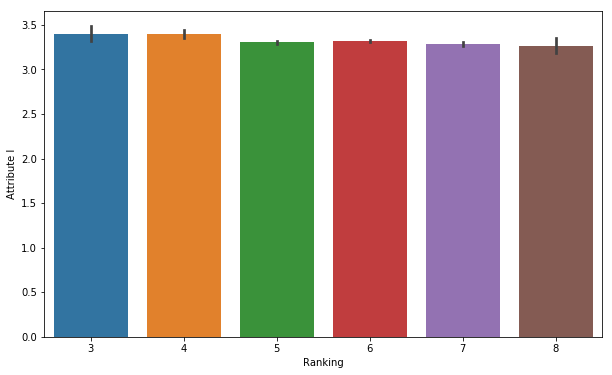

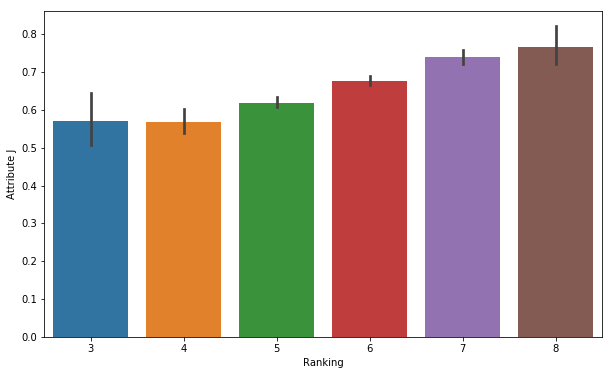

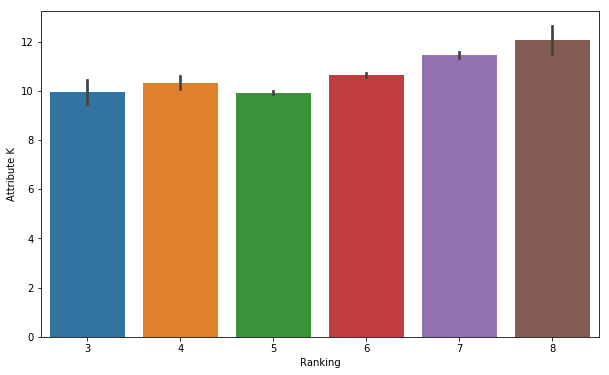

In [15]:
#Graph for Each attribute to Ranking
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute A', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute B', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute C', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute D', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute E', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute F', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute G', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute H', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute I', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute J', data = data)
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Ranking', y = 'Attribute K', data = data)


In [16]:
#Split data into two groups
X = data.drop('Ranking',axis = 1)
y = data.Ranking
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=113)

In [17]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("This is KNN Classifier result: ")
print(classification_report(y_test, knn_pred))

This is KNN Classifier result: 
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.20      0.07      0.11        14
          5       0.80      0.67      0.73       140
          6       0.55      0.66      0.60       103
          7       0.52      0.63      0.57        41
          8       0.00      0.00      0.00         1

avg / total       0.65      0.63      0.63       300



In [19]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print("This is Random Forest Classifier result: ")
print(classification_report(y_test, pred_rfc))

This is Random Forest Classifier result: 
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        14
          5       0.83      0.84      0.83       140
          6       0.64      0.79      0.70       103
          7       0.68      0.51      0.58        41
          8       0.00      0.00      0.00         1

avg / total       0.70      0.73      0.71       300



/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
#Stochastic Gradient Descent Classifier
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print("This is SGD Classifier result: ")
print(classification_report(y_test, pred_sgd))

This is SGD Classifier result: 
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.06      0.07      0.07        14
          5       0.70      0.59      0.64       140
          6       0.46      0.68      0.55       103
          7       0.46      0.15      0.22        41
          8       0.00      0.00      0.00         1

avg / total       0.55      0.53      0.52       300



/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("This is SVM Classifier result: ")
print(classification_report(y_test, pred_svc))

This is SVM Classifier result: 
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        14
          5       0.77      0.74      0.76       140
          6       0.55      0.79      0.65       103
          7       0.83      0.37      0.51        41
          8       0.00      0.00      0.00         1

avg / total       0.66      0.67      0.64       300



/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
#Finding best parameters for our SVC model by grid search
#Please wait a long time
'''
param = {
    'C': [0.001,0.01,0.1,1,10,100],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.001,0.01,0.1,1,10,100]
}
scores = ['precision']
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
print(grid_svc.best_params_)
'''

"\nparam = {\n    'C': [0.001,0.01,0.1,1,10,100],\n    'kernel':['linear', 'rbf'],\n    'gamma' :[0.001,0.01,0.1,1,10,100]\n}\nscores = ['precision']\ngrid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)\ngrid_svc.fit(X_train, y_train)\nprint(grid_svc.best_params_)\n"

In [23]:
#Run our SVC again with the best parameters.
svc2 = SVC(C = 1.1, gamma =  5.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print("This is SVM2 Classifier result: ")
print(classification_report(y_test, pred_svc2))

This is SVM2 Classifier result: 
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        14
          5       0.92      0.42      0.58       140
          6       0.45      0.98      0.61       103
          7       1.00      0.24      0.39        41
          8       0.00      0.00      0.00         1

avg / total       0.72      0.57      0.53       300



/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#This is the best model that I found to match data set

In [25]:
#Now let's predict your test
test = pd.read_csv('testData.csv',sep = ',')
X = data.drop('Ranking',axis = 1)
y = data.Ranking
Xt = test.drop('Ranking',axis = 1)
yt = test.Ranking
#Train and splitting of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Xt = sc.fit_transform(Xt)
#After Finding best parameters for our SVC model
#Run our SVC2 with the best parameters.
#The parameters is C = 0.1, gamma = 0.91, kernel = 'rbf'
svc2 = SVC(C = 0.1, gamma =  0.91, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(Xt)
print('This is my predictions!')
print(pred_svc2)

This is my predictions!
[5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [ ]:
#All of the above are predictions of my program.
#I have filled all the result in your excel file.
#Please check!